# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key 

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_weather_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Convert 'Max Temp' from Kelvin to Celsius
        city_weather['Max Temp'] = city_weather['Max Temp'] - 273.15

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

    # Append the City information into city_data list
        city_weather_data.append({
                          "City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 2 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 3 of Set 1 | sechura
City not found. Skipping...
Processing Record 4 of Set 1 | thisted
City not found. Skipping...
Processing Record 5 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 6 of Set 1 | ta`u
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 8 of Set 1 | east london
City not found. Skipping...
Processing Record 9 of Set 1 | hilo
City not found. Skipping...
Processing Record 10 of Set 1 | margaret river
City not found. Skipping...
Processing Record 11 of Set 1 | fort st. john
City not found. Skipping...
Processing Record 12 of Set 1 | afaahiti
City not found. Skipping...
Processing Record 13 of Set 1 | mount pearl
City not found. Skipping...
Processing Record 1

In [5]:
response

{'coord': {'lon': 22.3667, 'lat': 45.5333},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 279,
  'feels_like': 277.91,
  'temp_min': 279,
  'temp_max': 279,
  'pressure': 1020,
  'humidity': 70,
  'sea_level': 1020,
  'grnd_level': 977},
 'visibility': 10000,
 'wind': {'speed': 1.63, 'deg': 95, 'gust': 1.57},
 'rain': {'1h': 0.21},
 'clouds': {'all': 100},
 'dt': 1682720189,
 'sys': {'country': 'RO', 'sunrise': 1682738539, 'sunset': 1682789600},
 'timezone': 10800,
 'id': 671603,
 'name': 'Oţelu Roşu',
 'cod': 200}

In [11]:
city_weather_data


[]

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather_data)
  

# Show Record Count
city_data_df.count()

City          406
Lat           406
Lng           406
Max Temp      406
Humidity      406
Cloudiness    406
Wind Speed    406
Country       406
Date          406
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,296.99,66,100,2.68,PN,1682625647
1,avarua,-21.2078,-159.7750,299.18,69,100,2.57,CK,1682625920
2,alice springs,-23.7000,133.8833,289.90,88,100,3.08,AU,1682625920
3,albany,42.6001,-73.9662,288.58,48,26,0.89,US,1682625763
4,aykhal,66.0000,111.5000,261.16,100,95,1.76,RU,1682625921


In [9]:
# Create the "output_data" directory if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")
    
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.99,66,100,2.68,PN,1682625647
1,avarua,-21.2078,-159.7750,299.18,69,100,2.57,CK,1682625920
2,alice springs,-23.7000,133.8833,289.90,88,100,3.08,AU,1682625920
3,albany,42.6001,-73.9662,288.58,48,26,0.89,US,1682625763
4,aykhal,66.0000,111.5000,261.16,100,95,1.76,RU,1682625921


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

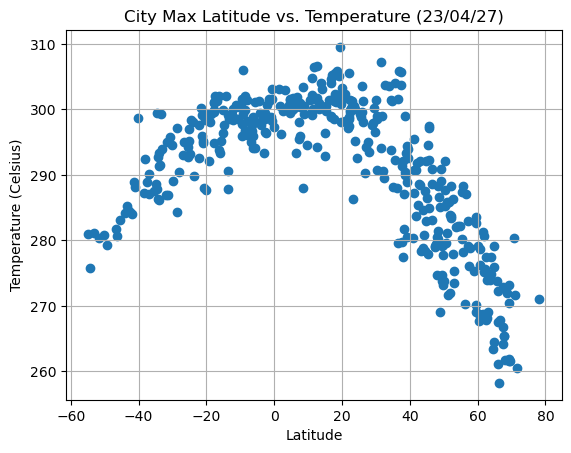

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

current_date = time.strftime('%y/%m/%d')
title = f"City Max Latitude vs. Temperature ({current_date})"

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

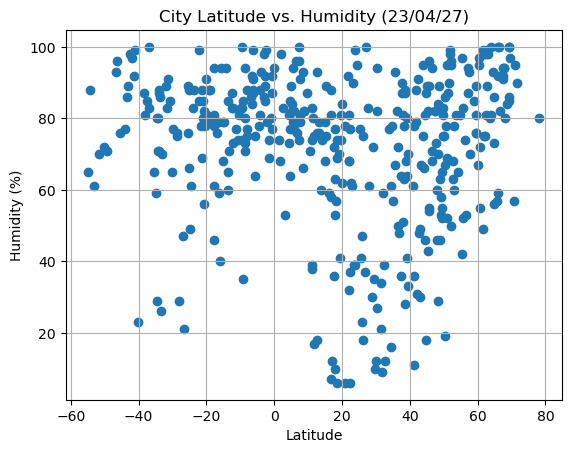

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Create title string with formatted date
current_date = time.strftime('%y/%m/%d')
title = f"City Latitude vs. Humidity ({current_date})"

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

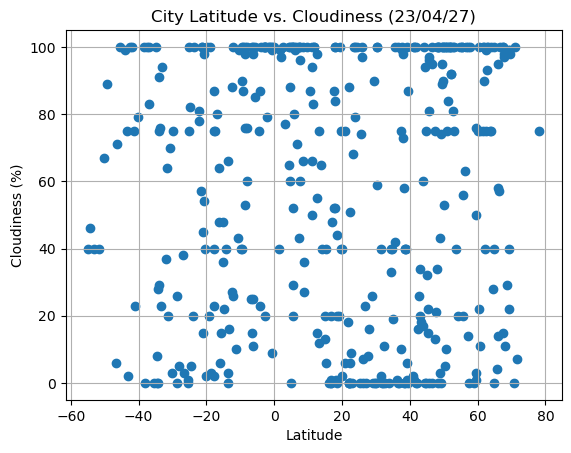

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Create title string with formatted date
current_date = time.strftime('%y/%m/%d')
title = f"City Latitude vs. Cloudiness ({current_date})"

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

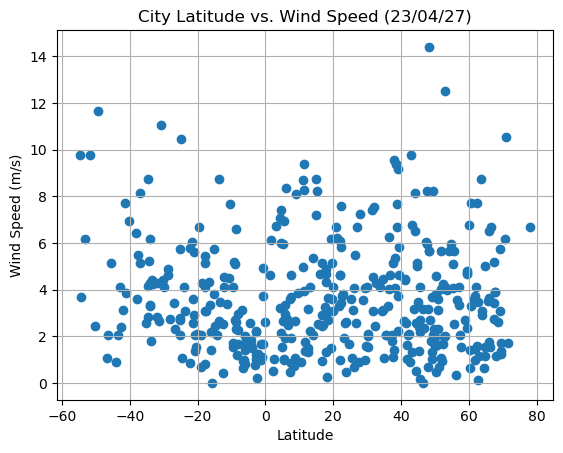

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Create title string with formatted date
current_date = time.strftime('%y/%m/%d')
title = f"City Latitude vs. Wind Speed ({current_date})"

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression_plots(df, y_value_col):
    # Extract x and y values from the DataFrame
    x_values = df["Lat"]
    y_values = df[y_value_col]
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    
    # Add labels and annotations to the plot
    plt.xlabel("Latitude")
    plt.ylabel(y_value_col)
    plt.annotate(line_eq, (6, 10), fontsize=15, color="red")
    
    
    # Print R-squared value
    print(f"The r-value is: {rvalue**2}")
    
    

    # Show the plot
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6001,-73.9662,288.58,48,26,0.89,US,1682625763
4,aykhal,66.0000,111.5000,261.16,100,95,1.76,RU,1682625921
7,kirsanov,52.6549,42.7224,286.31,68,81,1.95,RU,1682625923
8,udachny,66.4167,112.4000,258.23,100,57,1.54,RU,1682625763
10,tofol,5.3248,163.0078,299.98,84,100,5.96,FM,1682625925


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.99,66,100,2.68,PN,1682625647
1,avarua,-21.2078,-159.7750,299.18,69,100,2.57,CK,1682625920
2,alice springs,-23.7000,133.8833,289.90,88,100,3.08,AU,1682625920
5,san juan de miraflores,-12.1629,-76.9635,298.44,73,26,4.54,PE,1682625921
6,inhambane,-23.8650,35.3833,298.15,83,20,4.12,MZ,1682625922


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7432718426426184


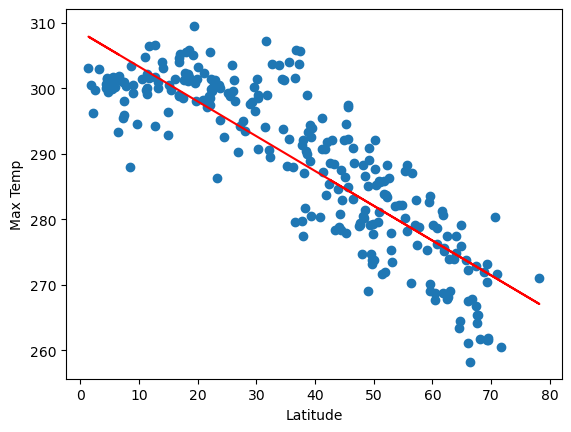

In [18]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Max Temp")


The r-value is: 0.6321280156659894


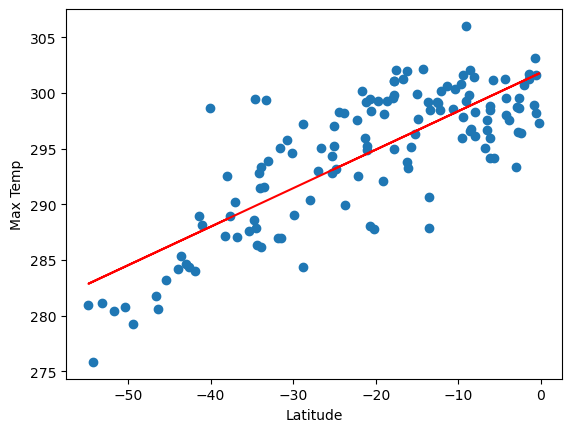

In [19]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Max Temp")



**Discussion about the linear relationship:**   The r-value of 0.6321280156659894 indicates a moderate positive linear relationship between the two variables. In other words, there is a moderate linear relationship between the latitude and the maximum temperature in the Northern Hemisphere.

This means that as you move closer to the equator (i.e., decrease in latitude), the chosen variable is also likely to increase.

It's important to keep in mind that correlation does not necessarily mean causation, and further analysis would be needed to determine the specific factors driving the observed relationship between latitude and the chosen variable in the Southern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.035471978532659945


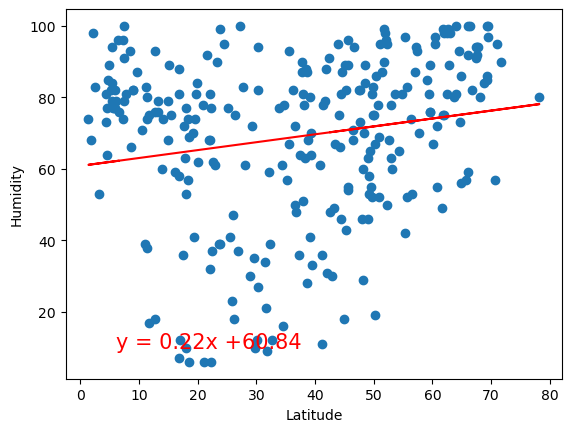

In [20]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Humidity")

The r-value is: 0.020687392677830103


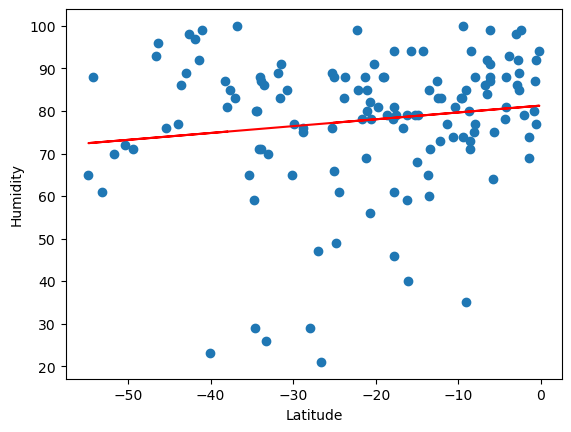

In [21]:

# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Humidity")

**Discussion about the linear relationship:** Based on the r-value of 0.020687392677830103, there may be a weak positive linear relationship between the two variables being measured. But r-value alone does not provide information about causation or the presence of non-linear relationships between the variables. Other factors can affect the interpretation of the r-value.




### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002207739330413193


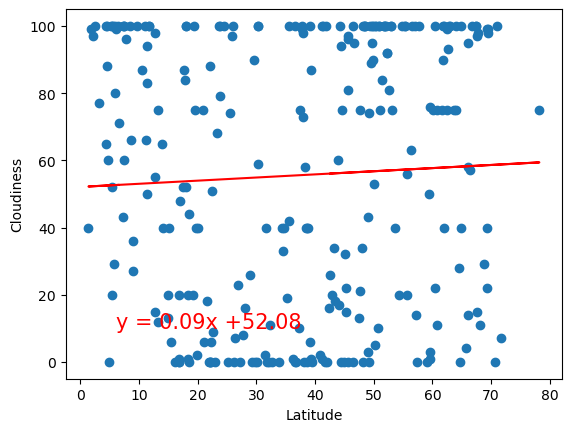

In [22]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Cloudiness")

The r-value is: 0.031582010525788115


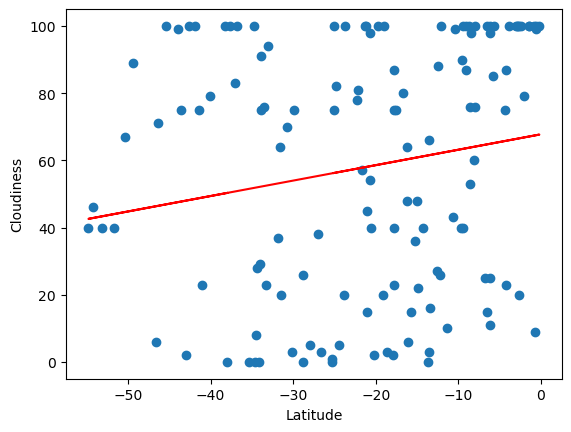

In [23]:

# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Cloudiness")

**Discussion about the linear relationship:** The r-value of 0.031582010525788115, which is a small positive number between 0 and 1, suggests that there may be a weak positive linear relationship between the two variables being measured. 
However, the r-value alone does not provide information about causation or the presence of non-linear relationships between the variables. Also, ther factors such as sample size and the distribution of the data can affect the interpretation of the r-value.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007034828087211801


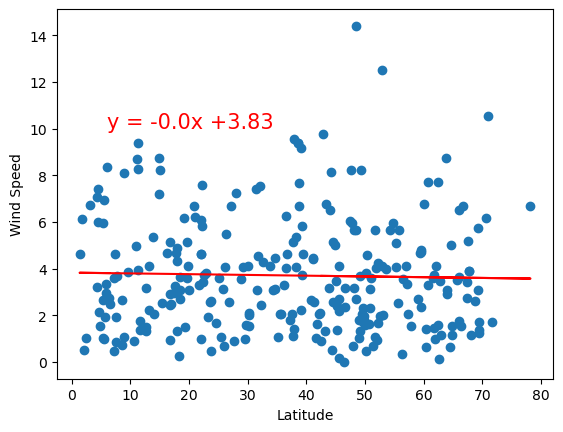

In [24]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Wind Speed")

The r-value is: 0.19672836044457795


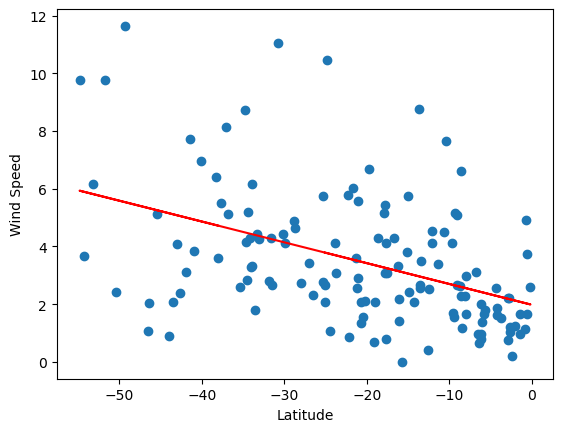

In [26]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Wind Speed")

**Discussion about the linear relationship:** The r-value of 0.19672836044457795 indicates that there is a weak positive linear relationship between wind speed and latitude in the southern hemisphere.
However, it's important to note that the r-value alone does not provide information about causation or the strength of any non-linear relationships that may exist between the variables. Additionally, other factors such as sample size and the distribution of the data can affect the interpretation of the r-value.